In [19]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [13]:
# Load the dataset
data = pd.read_csv("heart_attack_prediction_dataset.csv")

In [18]:
#Display the first 5 rows of the dataset
print (data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [12]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
data.describe(include='number')

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [7]:
data.describe(include='object')

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [9]:
#checking for any missing values
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [10]:
#removing null values
filtered_data = data.dropna()

In [11]:
data.isnull().sum().sum()

0

In [8]:
#print Duplicates 
print(data.duplicated().to_string)

<bound method Series.to_string of 0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool>


In [191]:
#removing duplicates values
filtered_data = data.drop_duplicates()
data=pd.DataFrame(data)

In [193]:
data[['Age','Heart Attack Risk','Cholesterol']]
sample_size = 1000  
data_subset_sample = data_subset.sample(n=sample_size, random_state=0)
data_KMedoid = np.array(data_subset_sample) 

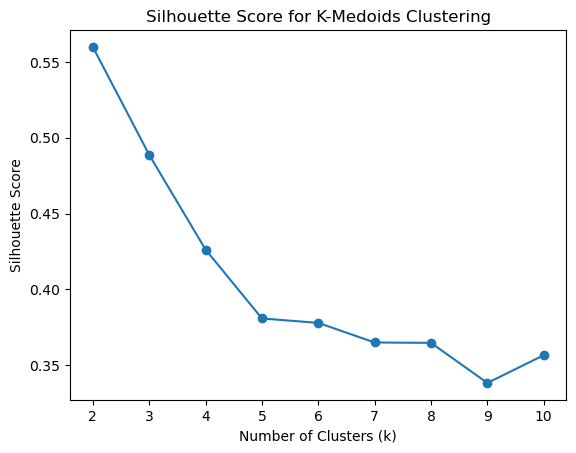

In [195]:
#to know optimal number of clusters
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_KMedoid )
    labels = kmedoids.fit_predict(data_KMedoid )
    silhouette_scores.append(silhouette_score(data_KMedoid ,   labels ))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Medoids Clustering')
plt.show()

In [196]:
k = 3
kmedoids = KMedoids(n_clusters=k).fit(data_KMedoid)
clusters=kmedoids .cluster_centers_
labels=kmedoids .labels_

In [197]:
print("Cluster Centers:")
print(clusters)
print("Labels:")
print(labels)

Cluster Centers:
[[ 56.   1. 255.]
 [ 53.   0. 357.]
 [ 50.   1. 163.]]
Labels:
[2 0 2 2 2 2 1 0 2 1 2 0 2 2 1 2 1 0 1 0 1 2 0 0 1 1 0 1 2 0 0 0 1 0 1 0 2
 2 1 1 1 0 2 1 0 2 1 1 0 2 1 0 0 2 1 0 0 1 1 0 2 1 1 1 0 1 0 0 2 1 2 0 1 1
 0 2 2 1 1 0 0 0 2 0 2 2 2 0 2 0 2 0 2 0 0 0 1 2 0 0 0 0 1 0 0 2 2 1 1 2 0
 0 0 1 0 1 2 2 0 2 1 2 2 1 2 1 0 2 2 1 2 1 0 1 2 2 2 0 0 1 2 2 0 0 2 0 2 1
 2 2 1 2 1 2 1 2 0 0 0 1 2 0 0 1 2 1 2 0 2 0 1 0 2 1 0 0 0 1 2 2 0 0 1 0 1
 2 1 1 0 1 0 0 0 0 0 0 0 2 2 1 0 1 2 0 2 2 2 1 0 2 1 1 2 0 2 2 0 2 0 2 1 0
 2 0 2 0 0 0 0 2 0 2 1 2 1 0 0 2 1 2 2 2 1 2 0 0 2 2 2 0 2 2 0 0 0 2 2 2 1
 1 2 0 0 2 2 0 2 2 0 2 0 1 1 1 1 1 0 0 0 2 2 1 1 1 2 2 1 1 1 0 0 1 1 0 1 0
 0 2 0 0 1 2 0 2 2 0 1 1 2 0 2 1 1 1 2 0 2 0 1 1 2 1 1 1 1 0 1 1 1 2 0 2 1
 1 0 1 1 0 1 0 1 1 2 2 0 0 0 1 1 2 2 1 1 1 2 2 2 0 1 0 1 0 2 1 1 0 1 0 1 1
 0 2 0 0 0 1 2 1 2 2 2 1 0 0 0 1 2 0 1 1 2 2 1 1 1 1 1 2 1 2 0 1 0 0 0 1 1
 0 2 0 0 2 2 0 0 0 1 2 2 0 0 1 0 0 0 2 2 2 1 0 1 0 1 0 2 1 0 2 2 2 2 0 2 1
 0 1 2 2 1 0 1 2 0 2

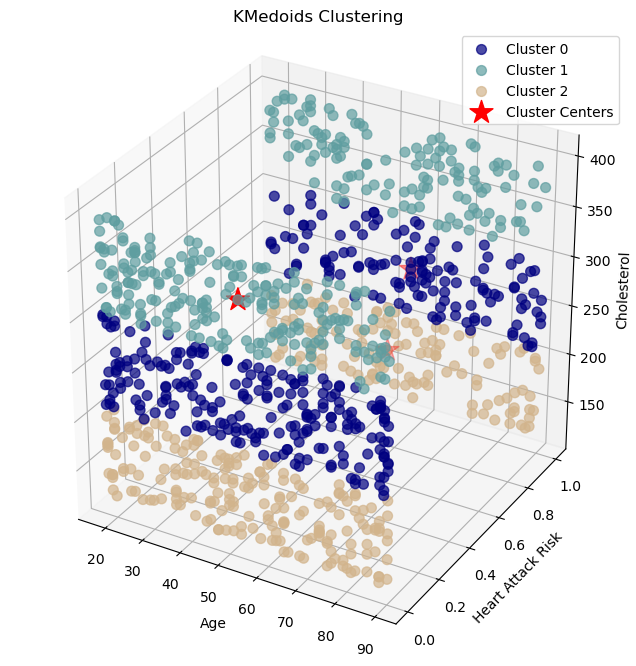

In [206]:
cluster_colors = ['navy', 'cadetblue', 'tan']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in zip(range(k), cluster_colors):
    cluster_points = data_KMedoid[labels == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {cluster_label}', s=50, alpha=0.7)

ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c='red', marker='*', s=300, label='Cluster Centers')

ax.set_xlabel('Age')
ax.set_ylabel('Heart Attack Risk')
ax.set_zlabel('Cholesterol')
ax.set_box_aspect([1, 1, 1])
ax.legend(loc='upper right')
plt.title('KMedoids Clustering')
plt.grid(True)
plt.show()